In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('/Users/shauryasighadia/Desktop/sem6/Time Series Analysis/Mini Project/data/Rainfall Data.xlsx')
data.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,34.7,37.7,18.0,39.3,50.8,113.4,242.2,272.9,124.4,52.7,38.0,8.3
1,1902,7.4,4.3,19.0,43.5,48.3,108.8,284.0,199.7,201.5,61.5,27.9,24.4
2,1903,17.0,8.3,31.3,17.1,59.5,118.3,297.0,270.4,199.1,117.9,36.9,17.7
3,1904,14.4,9.6,31.8,33.1,72.4,164.8,261.0,206.4,129.6,69.0,11.2,16.3
4,1905,25.3,20.9,42.7,33.7,55.7,93.3,252.8,200.8,178.4,51.4,9.7,10.5


In [3]:
data_long = pd.melt(data, id_vars=['YEAR'], var_name='MONTH', value_name='RAINFALL')
data_long['DATE'] = pd.to_datetime(data_long['YEAR'].astype(str) + data_long['MONTH'], format='%Y%b')
data_long = data_long[['DATE', 'RAINFALL']]
data_long = data_long.sort_values(by='DATE').reset_index(drop=True)
data_long.columns = ['Date', 'Rainfall']
data_long.head()

,Date,Rainfall
0,1901-01-01,34.7
1,1901-02-01,37.7
2,1901-03-01,18.0
3,1901-04-01,39.3
4,1901-05-01,50.8


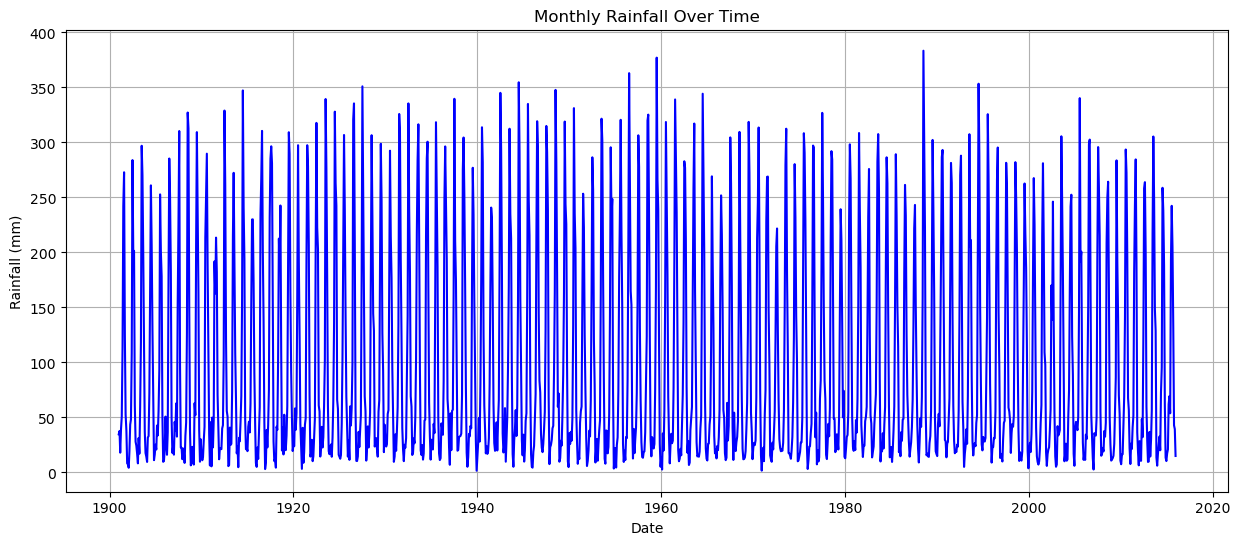

In [4]:
plt.figure(figsize=(15, 6))
plt.plot(data_long['Date'], data_long['Rainfall'], color='blue')
plt.title('Monthly Rainfall Over Time')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.show()

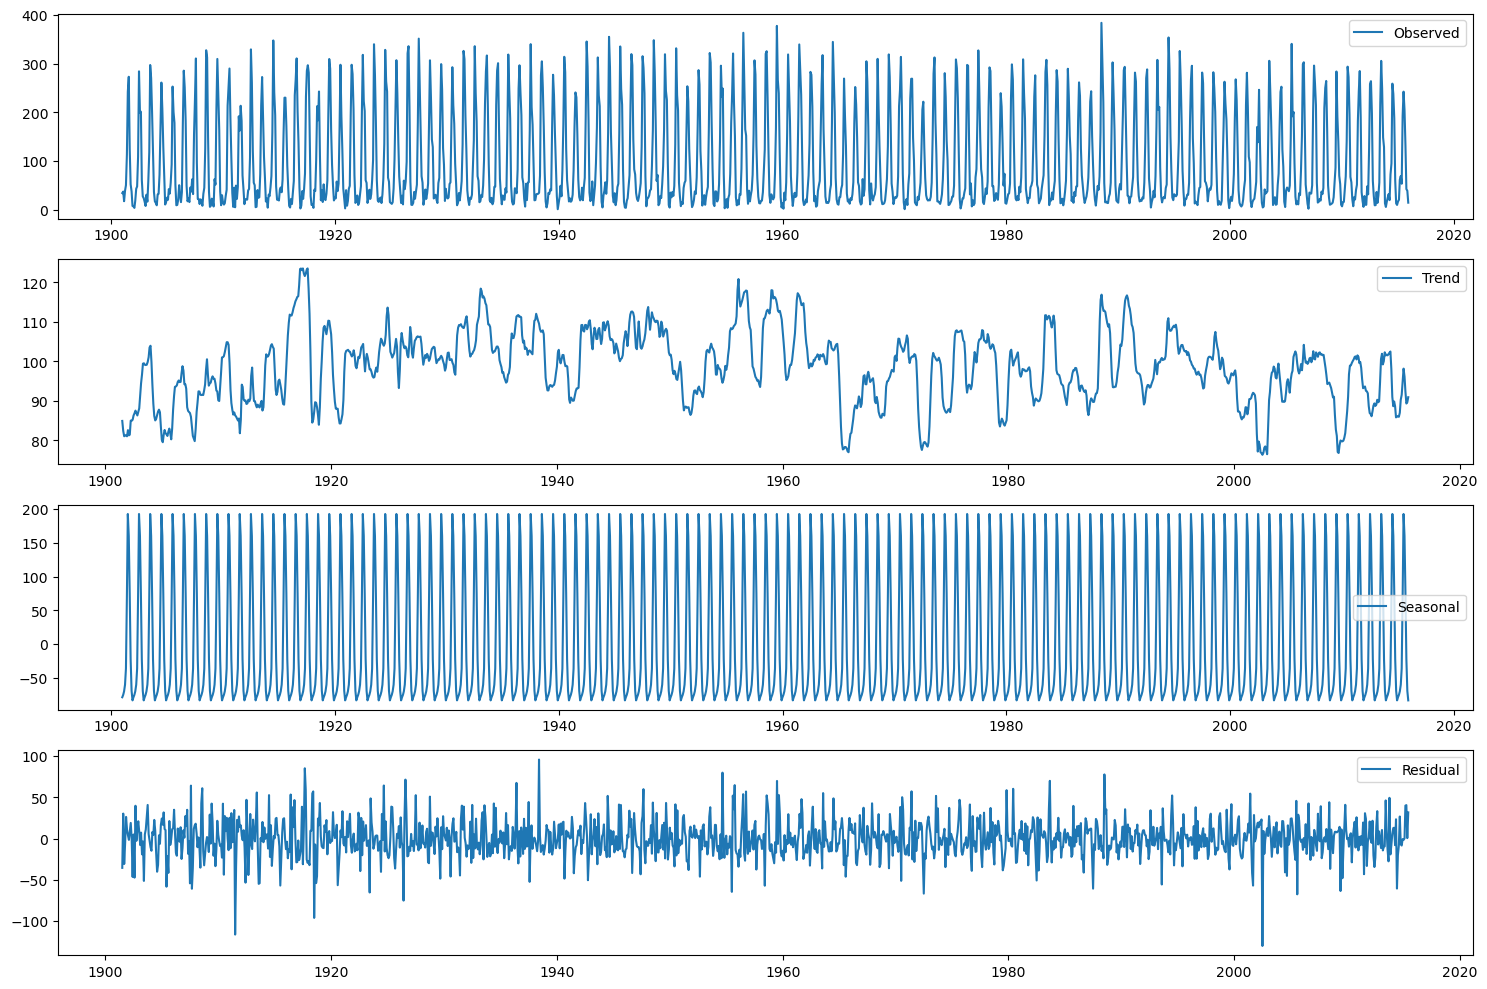

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
data_long = data_long.set_index('Date')
result = seasonal_decompose(data_long)
observed = result.observed
trend = result.trend
seasonal = result.seasonal
residual = result.resid
plt.figure(figsize=(15, 10))
plt.subplot(411)
plt.plot(observed, label='Observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

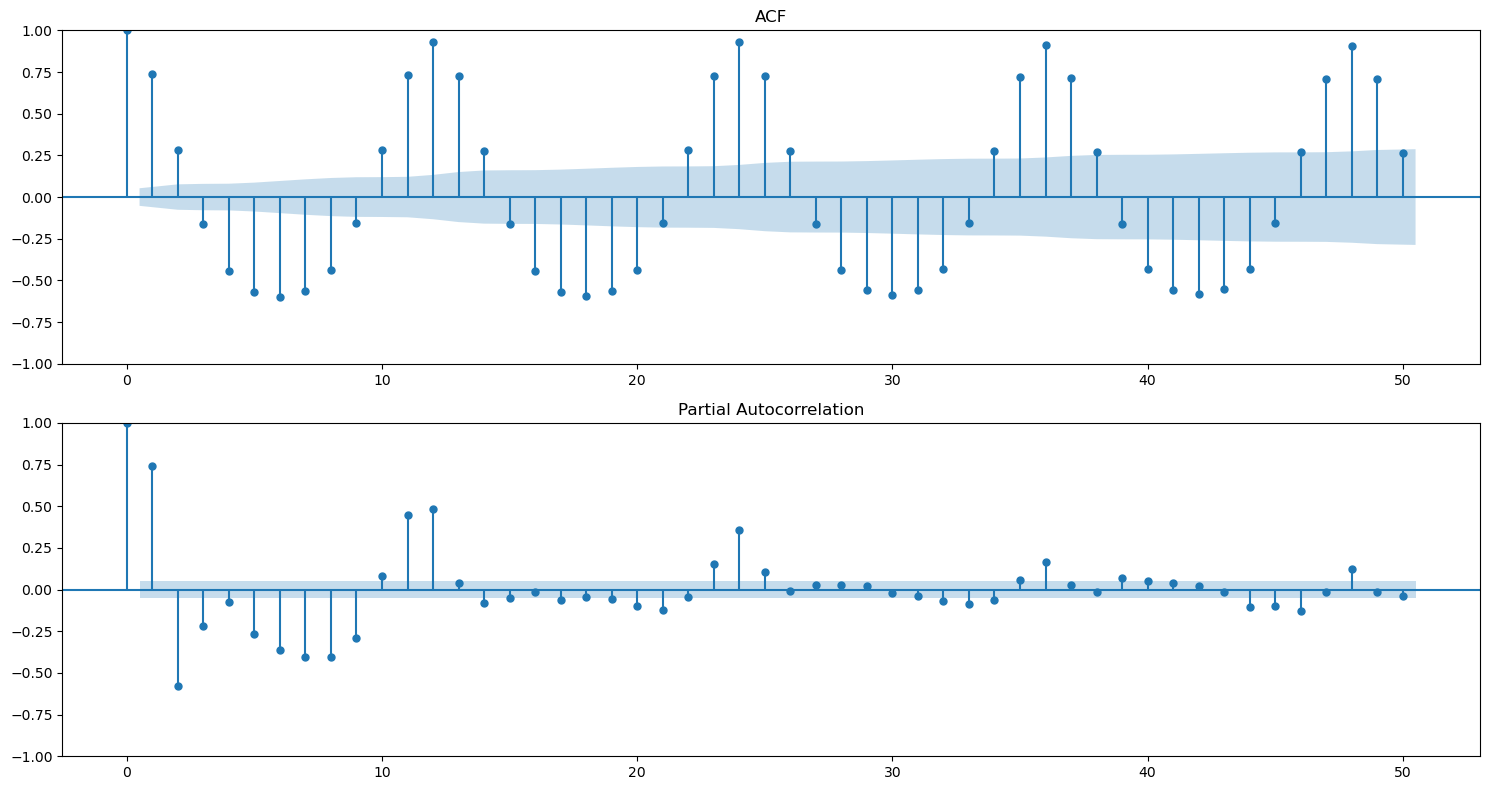

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(15, 8))
plt.subplot(211)
plot_acf(data_long, lags=50, ax=plt.gca())
plt.title('ACF')
plt.subplot(212)
plt.title('PACF')
plot_pacf(data_long, lags=50, ax=plt.gca())
plt.tight_layout()
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(data_long, autolag='AIC')
print(f'ADF Statistic: {adf[0]}')
print(f'p-value: {adf[1]}')
print(f'Critical Values: {adf[4]}')

ADF Statistic: -4.956382329364315
p-value: 2.7054261374595157e-05
Critical Values: {'1%': -3.4351852261663867, '5%': -2.863675384893896, '10%': -2.5679068804891}


In [8]:
from statsmodels.tsa.stattools import kpss

kpss_stat = kpss(data_long, regression='c', nlags='auto')
print(f'KPSS Statistic: {kpss_stat[0]}')
print(f'p-value: {kpss_stat[1]}')
print(f'Critical Values: {kpss_stat[3]}')

KPSS Statistic: 0.16263600069914216
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [9]:
y = data_long['Rainfall'].resample('MS').mean()
train = y[:'2009']
test = y['2010':]

In [10]:
from pmdarima.arima import auto_arima
arima_model = auto_arima(train, seasonal = True, m = 12, stepwise = False, trace = 1, random_state = 10)

 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=15706.472, Time=0.04 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=14678.765, Time=0.44 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=14084.420, Time=2.44 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=12325.851, Time=1.55 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=12851.665, Time=5.63 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=3.82 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=4.74 sec
 ARIMA(0,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=14775.856, Time=0.21 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=14147.615, Time=0.89 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=13732.725, Time=3.19 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=12943.663, Time=0.80 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=12464.132, Time=1.90 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=12589.768, Time=6.79 sec
 ARIM

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train, order = (0, 0, 0), seasonal_order = (1, 0, 1, 12), enforce_stationarity = False, enforce_invertibility = False)
result = model.fit()
result.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.64607D+00    |proj g|=  6.97019D-01

At iterate    5    f=  4.62907D+00    |proj g|=  3.76059D+00

At iterate   10    f=  4.61821D+00    |proj g|=  1.32995D-02

At iterate   15    f=  4.61821D+00    |proj g|=  9.93008D-02


 This problem is unconstrained.



At iterate   20    f=  4.61804D+00    |proj g|=  1.27168D+00

At iterate   25    f=  4.61404D+00    |proj g|=  2.25032D+00

At iterate   30    f=  4.60884D+00    |proj g|=  9.58474D-01

At iterate   35    f=  4.60825D+00    |proj g|=  3.29002D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     36     66      1     0     0   3.290D-05   4.608D+00
  F =   4.6082484831989516     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:                   Rainfall   No. Observations:                 1308
Model:             SARIMAX(1, 0, [1], 12)   Log Likelihood               -6027.589
Date:                    Mon, 20 May 2024   AIC                          12061.178
Time:                            21:43:13   BIC                          12076.677
Sample:                        01-01-1901   HQIC                         12066.994
                             - 12-01-2009                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9999      0.000   4661.566      0.000       1.000       1.000
ma.S.L12      -0.9517      0.008   -116.437      0.000      -0.968      -0.936
sigma2       632.2197     15.859     39.865      0.000     601.137     663.303
===================================================================================
Ljung-Box (L1) (Q):                  26.48   Jarque-Bera (JB):               463.35
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.70   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

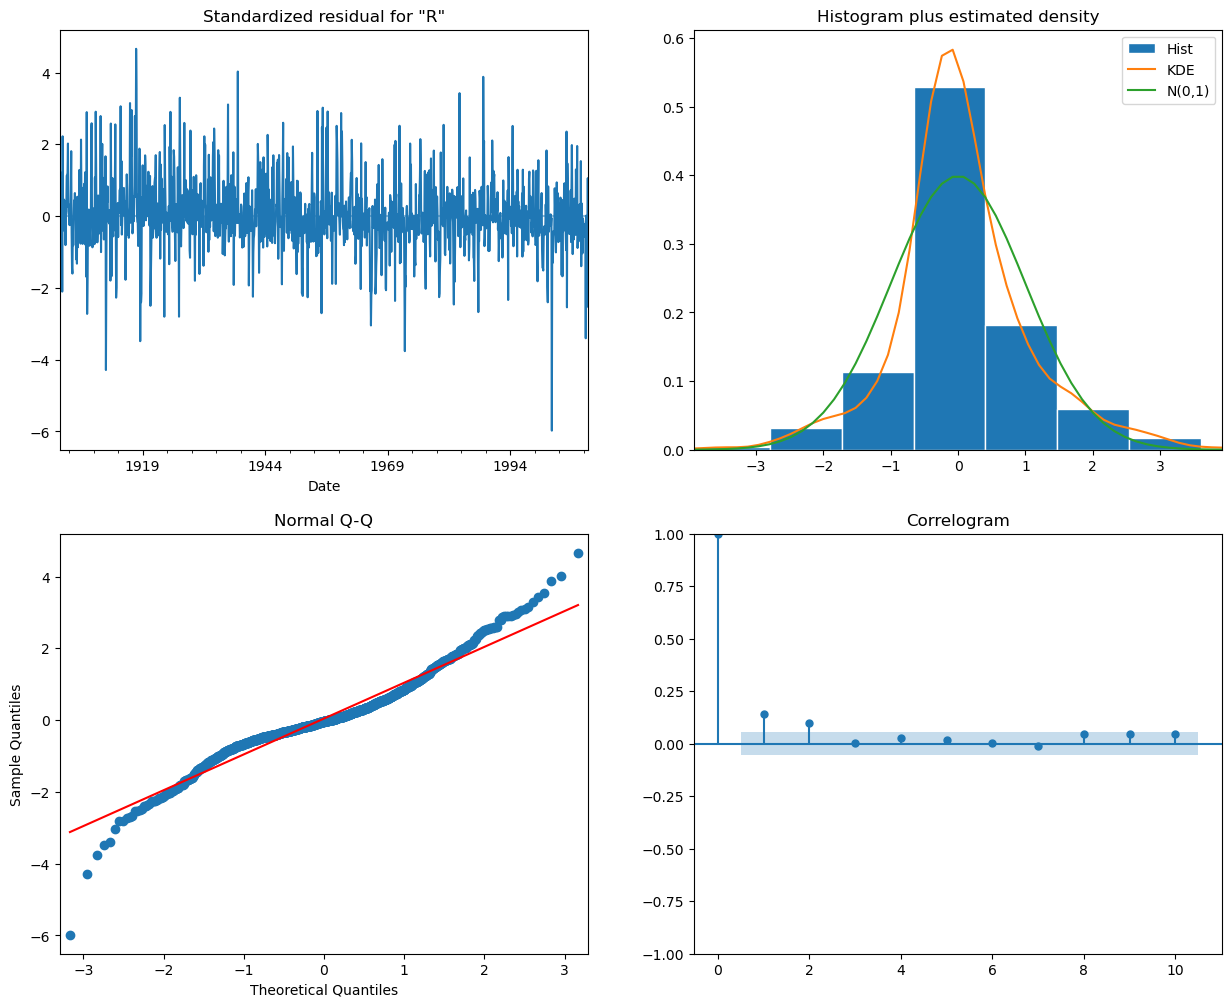

In [12]:
result.plot_diagnostics(figsize=(15, 12))
plt.show()

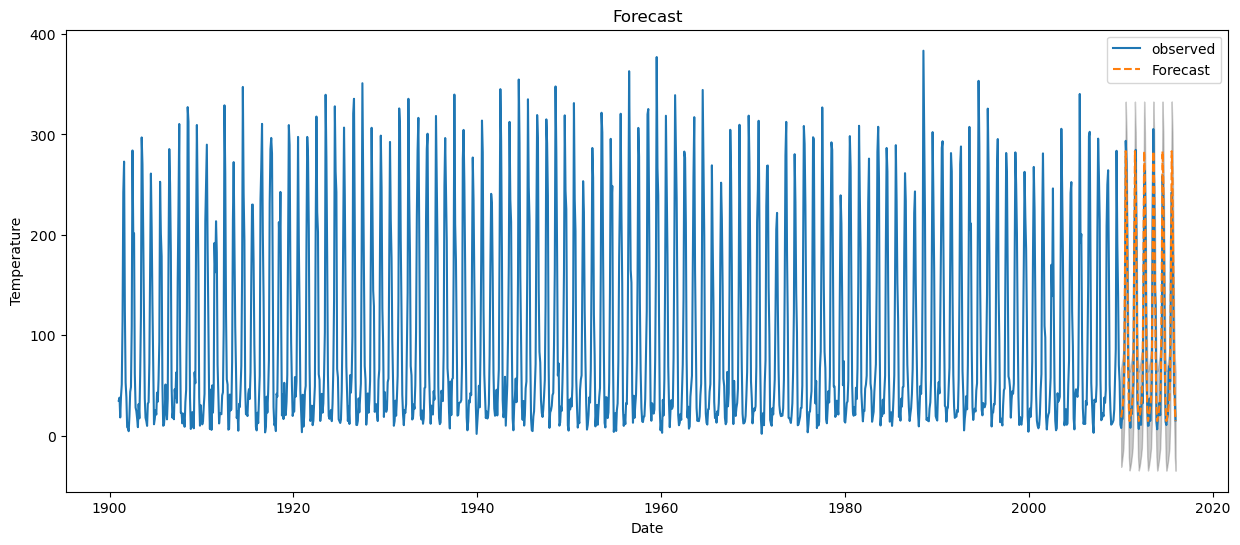

In [13]:
forecast = result.get_forecast(steps = len(test))
plt.figure(figsize=(15, 6))
plt.plot(y.index, y, label='observed')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Forecast', linestyle='--')
plt.fill_between(forecast.conf_int().index, forecast.conf_int()['lower Rainfall'], forecast.conf_int()['upper Rainfall'], color='k', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Forecast')
plt.legend()
plt.show()

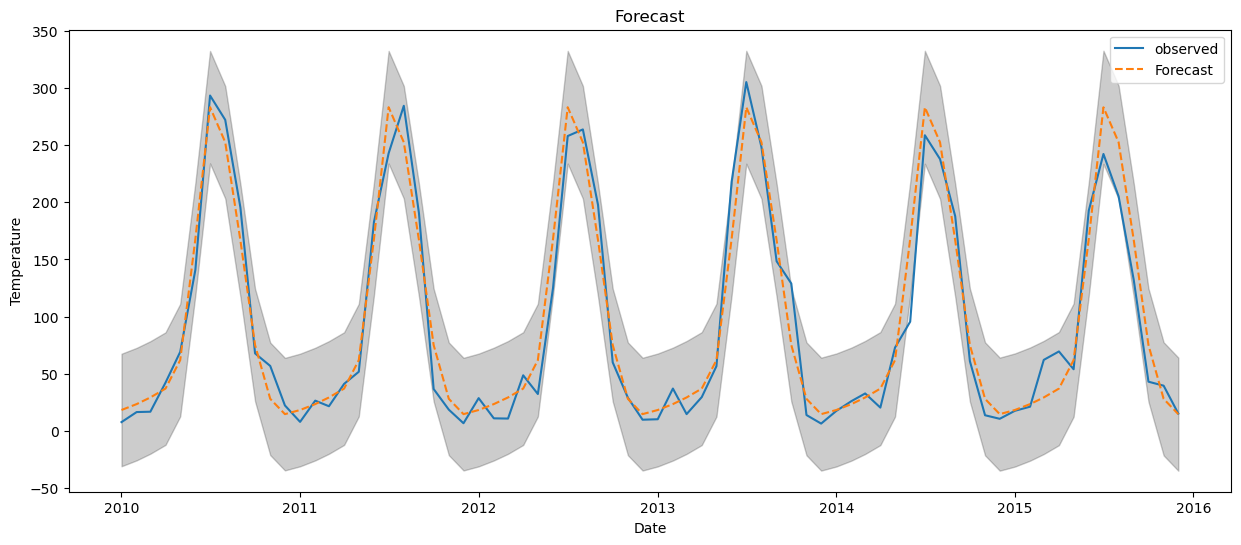

In [14]:
plt.figure(figsize=(15, 6))
plt.plot(y['2010':].index, y['2010':], label='observed')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Forecast', linestyle='--')
plt.fill_between(forecast.conf_int().index, forecast.conf_int()['lower Rainfall'], forecast.conf_int()['upper Rainfall'], color='k', alpha=0.2)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Forecast')
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(test, forecast.predicted_mean)
rmse = sqrt(mse)

print(f'RMSE: {rmse}')
print(f'MSE: {mse}')

RMSE: 22.89492355651714
MSE: 524.1775246587633
